# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ridho Aditya Rosman Eka Putra
- **Email:** ridhoaditya925@gmail.com
- **ID Dicoding:** B_iGloO

## Menentukan Pertanyaan Bisnis

- Pada hari apa dan jam berapa biasanya terjadi peminjaman sepeda terbanyak?
- Apakah ada pengaruh workingday, holiday pada casual atau registered user
- Apakah ada pengaruh musim pada total pesepada (lanjutan)


## Import Semua Packages/Library yang Digunakan

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

In [145]:
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

In [146]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [147]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Sesuai dengan yang ada pada deskripsi dataset, data pada ```day_df``` adalah data *bike sharing* per-hari, dan ```hour_df``` adalah data *bike_sharing* per-jam. Karenanya ```day_df``` tidak memiliki kolom ```hr``` atau hour.
- Sejatinya kedua data berasal dari kasus yang sama, data pada ```day_df``` adalah hasil penggabungan data pada hari yang sama pada ```hour_df```.

- Oleh Karena data ini sama, maka tidak dibutuhkan untuk *merging data*. Untuk analisis per jam akan digunakan ```hour_df``` dan untuk analisis per hari akan digunakan ```day_df```.

### Assessing Data

Assesing data untuk day

In [148]:
# pada tahap ini kita mengecek info untuk setiap columnya,
# kita mengecek apakah ada ketidak-sesuaian jumlah data ataupun ketidak-sesuain type data

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [149]:
# pada tahap ini kita mengecek statistik singkat untuk setiap columnya,
# kita mengecek apakah ada ketidak-sesuaian data atau nilai yang abnormal

day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [150]:
# pada tahap ini kita mengecek berapa banyak nilai yang NA pada setiap kolom

print(day_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [151]:
# pada tahap ini ktia mengecek berapa banyak data yang duplikat

print('Jumlah duplikasi data:', day_df.duplicated().sum())

Jumlah duplikasi data: 0


Assesing data untuk hour

In [152]:
# pada tahap ini kita mengecek info untuk setiap columnya,
# kita mengecek apakah ada ketidak-sesuaian jumlah data ataupun ketidak-sesuain type data

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [153]:
# pada tahap ini kita mengecek statistik singkat untuk setiap columnya,
# kita mengecek apakah ada ketidak-sesuaian data atau nilai yang abnormal

hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [154]:
# pada tahap ini kita mengecek berapa banyak nilai yang NA pada setiap kolom

print(hour_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [155]:
# pada tahap ini ktia mengecek berapa banyak data yang duplikat

print('Jumlah duplikasi data:', hour_df.duplicated().sum())

Jumlah duplikasi data: 0


**Insight:**
- tabel day: terdapat kesalahan data type pada kolom dteday yang seharusnya ```datetime``` bukan ```object```, selanjutnya tidak ditemukan *null value* dan *duplicate data*, tidak ditemukan juga inacurate value.
- tabel hour: sama seperti tabel day, terdapat kesalahan data type pada kolom ```dteday``` yang seharusnya ```datetime``` bukan ```object```, selanjutnya tidak ditemukan *null value* dan *duplicate data*, tidak ditemukan juga inacurate value.

### Cleaning Data

In [156]:
# mengganti data type untuk kolom dteday pada tabel day dan hour menjadi datetime

day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [157]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [158]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Karena kesalahan yang ditemukan hanya kesalahan data type oleh karenanya kita langsung mengganti data type pada kolom tersebut
- Setelah proses perubahan, data type pada kolom ```dteday``` tabel hour dan day kini menjadi ```datatime```.

## Exploratory Data Analysis (EDA)

Explore for Q1

In [159]:
def getEksploreForQ1(df, key, sort_by):
  return df.groupby(by=key)[
      ['casual',
       'registered',
       'cnt']].sum().sort_values(by=sort_by, ascending=False)

def getEksploreForQ1NoSort(df, key, sort_by):
  return df.groupby(by=key)[
      ['casual',
       'registered',
       'cnt']].sum()

In [160]:
print("\n=== Hari Dengan Pelanggan Total Terbanyak ===\n")
print(getEksploreForQ1(day_df, "weekday", "cnt"))

print("\n=== Hari Dengan Pelanggan Registered Terbanyak ===\n")
print(getEksploreForQ1(day_df, "weekday", "registered"))

print("\n=== Hari Dengan Pelanggan Casual Terbanyak ===\n")
print(getEksploreForQ1(day_df, "weekday", "casual"))

print("\n=== Jam Dengan Pelanggan Total Terbanyak ===\n")
print(getEksploreForQ1(hour_df, "hr", "cnt"))

print("\n=== Jam Dengan Pelanggan Registered Terbanyak ===\n")
print(getEksploreForQ1(hour_df, "hr", "registered"))

print("\n=== Jam Dengan Pelanggan Casual Terbanyak ===\n")
print(getEksploreForQ1(hour_df, "hr", "casual"))


=== Hari Dengan Pelanggan Total Terbanyak ===

         casual  registered     cnt
weekday                            
5         78238      409552  487790
4         61460      423935  485395
6        153852      323955  477807
3         57319      415729  473048
2         57843      411266  469109
1         70784      384719  455503
0        140521      303506  444027

=== Hari Dengan Pelanggan Registered Terbanyak ===

         casual  registered     cnt
weekday                            
4         61460      423935  485395
3         57319      415729  473048
2         57843      411266  469109
5         78238      409552  487790
1         70784      384719  455503
6        153852      323955  477807
0        140521      303506  444027

=== Hari Dengan Pelanggan Casual Terbanyak ===

         casual  registered     cnt
weekday                            
6        153852      323955  477807
0        140521      303506  444027
5         78238      409552  487790
1         70784      3

Explore for Q2

In [161]:
day_df.groupby(by='workingday')[
      ['casual',
       'registered',
       'cnt']].sum().sort_values(by='casual', ascending=False)

,casual,registered,cnt
workingday,,,
0,316732,683537,1000269
1,303285,1989125,2292410


In [162]:
day_df[['workingday', 'casual', 'registered', 'cnt']].corr()

,workingday,casual,registered,cnt
workingday,1.000000,-0.518044,0.303907,0.061156
casual,-0.518044,1.000000,0.395282,0.672804
registered,0.303907,0.395282,1.000000,0.945517
cnt,0.061156,0.672804,0.945517,1.000000


Explore for Q3

In [163]:
day_df[['season', 'cnt']].corr()

,season,cnt
season,1.0000,0.4061
cnt,0.4061,1.0000


In [164]:
day_df.groupby(by='season')[
      ['casual',
       'registered',
       'cnt']].sum().sort_values(by='cnt', ascending=False)

,casual,registered,cnt
season,,,
3,226091,835038,1061129
2,203522,715067,918589
4,129782,711831,841613
1,60622,410726,471348


**Insight:**
- Untuk pertanyaan 1, ditemukan bahwa secara total pelanggan akan melakukan pemesanan pada hari ke-5 atau kamis. dalam harian biasanya juga pelangga akan melakukan pemesanan pada 17:00
- Untuk pertanyaan 2, ditemukan Korelasi negatif yang kuat pada workingday dan pelanggan casual. Korelasi ditemukan sebanyak -0.5 atau 50%
- Untuk pertanyaan 3, ditemukan Korelasi Positif yang lumayan kuat pada season dan total pelanggan. Korelasi ditemukan sebanyak 0.4 atau 40%

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [165]:
total_customers = getEksploreForQ1NoSort(day_df, "weekday", "cnt")
registered_customers = getEksploreForQ1NoSort(day_df, "weekday", "registered")
casual_customers = getEksploreForQ1NoSort(day_df, "weekday", "casual")

print(total_customers)
print(registered_customers)
print(casual_customers)

         casual  registered     cnt
weekday                            
0        140521      303506  444027
1         70784      384719  455503
2         57843      411266  469109
3         57319      415729  473048
4         61460      423935  485395
5         78238      409552  487790
6        153852      323955  477807
         casual  registered     cnt
weekday                            
0        140521      303506  444027
1         70784      384719  455503
2         57843      411266  469109
3         57319      415729  473048
4         61460      423935  485395
5         78238      409552  487790
6        153852      323955  477807
         casual  registered     cnt
weekday                            
0        140521      303506  444027
1         70784      384719  455503
2         57843      411266  469109
3         57319      415729  473048
4         61460      423935  485395
5         78238      409552  487790
6        153852      323955  477807


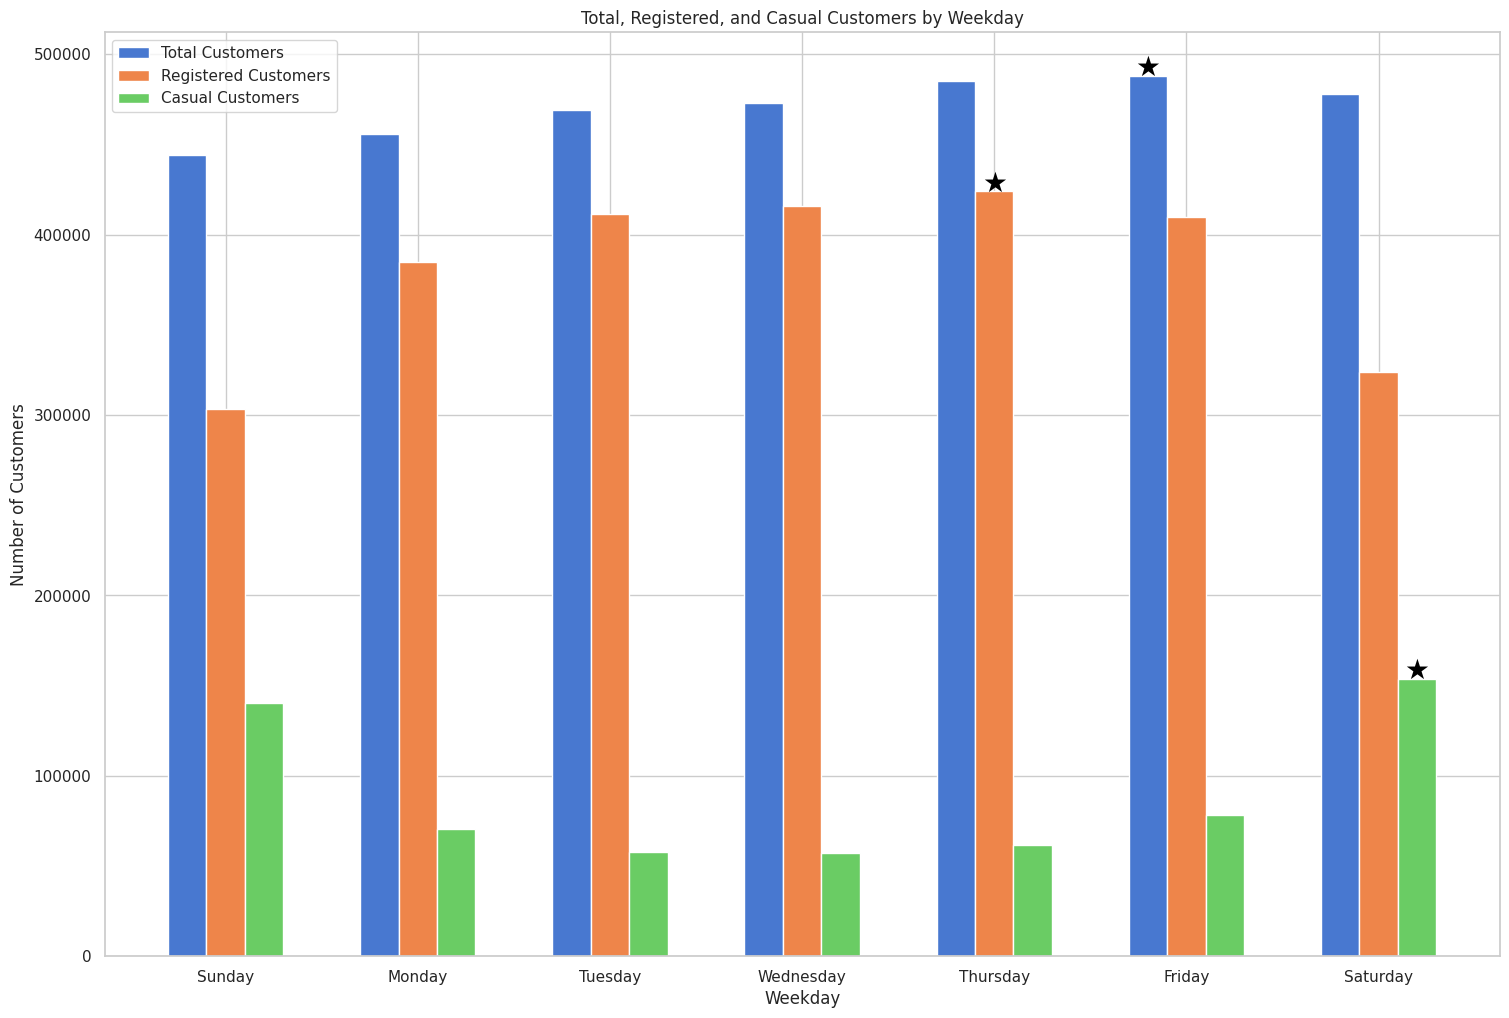

In [166]:
weekday_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

# Set the Seaborn style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("muted")

fig, ax = plt.subplots(figsize=(18, 12))

width = 0.2  # the width of the bars
x = np.arange(len(total_customers.index))

# Plotting the bars
total_bars = ax.bar(x - width, total_customers['cnt'], width, label='Total Customers', color=palette[0])
registered_bars = ax.bar(x, registered_customers['registered'], width, label='Registered Customers', color=palette[1])
casual_bars = ax.bar(x + width, casual_customers['casual'], width, label='Casual Customers', color=palette[2])

# Highlight the highest bars and add stars
max_total_index = total_customers['cnt'].idxmax()
max_registered_index = registered_customers['registered'].idxmax()
max_casual_index = casual_customers['casual'].idxmax()

# total_bars[max_total_index].set_color('red')
# registered_bars[max_registered_index].set_color('orange')
# casual_bars[max_casual_index].set_color('yellow')

# Adding stars above the highest bars
ax.annotate('★',
            (x[max_total_index] - width, total_customers['cnt'][max_total_index] + 5),
            color='black', fontsize=20, ha='center')
ax.annotate('★',
            (x[max_registered_index], registered_customers['registered'][max_registered_index] + 5),
            color='black', fontsize=20, ha='center')
ax.annotate('★',
            (x[max_casual_index] + width, casual_customers['casual'][max_casual_index] + 5),
            color='black', fontsize=20, ha='center')

# Adding labels and title
ax.set_xlabel('Weekday')
ax.set_ylabel('Number of Customers')
ax.set_title('Total, Registered, and Casual Customers by Weekday')
ax.set_xticks(x)
ax.set_xticklabels([weekday_mapping[i] for i in total_customers.index])
ax.legend()

plt.show()


In [167]:
total_customers = getEksploreForQ1NoSort(hour_df, "hr", "cnt")
registered_customers = getEksploreForQ1NoSort(hour_df, "hr", "registered")
casual_customers = getEksploreForQ1NoSort(hour_df, "hr", "casual")

print(total_customers)
print(registered_customers)
print(casual_customers)

    casual  registered     cnt
hr                            
0     7375       31755   39130
1     4709       19455   24164
2     3412       12940   16352
3     1893        6281    8174
4      874        3554    4428
5     1012       13249   14261
6     3017       52115   55132
7     8037      146134  154171
8    15761      245240  261001
9    22458      136980  159438
10   33789       92468  126257
11   43286      108034  151320
12   49718      134696  184414
13   52713      132206  184919
14   55089      120563  175652
15   54606      128543  183149
16   53834      173914  227748
17   54220      282640  336860
18   44496      265276  309772
19   35505      191284  226789
20   26378      138172  164550
21   20570      104875  125445
22   16200       79412   95612
23   11065       52876   63941
    casual  registered     cnt
hr                            
0     7375       31755   39130
1     4709       19455   24164
2     3412       12940   16352
3     1893        6281    8174
4      8

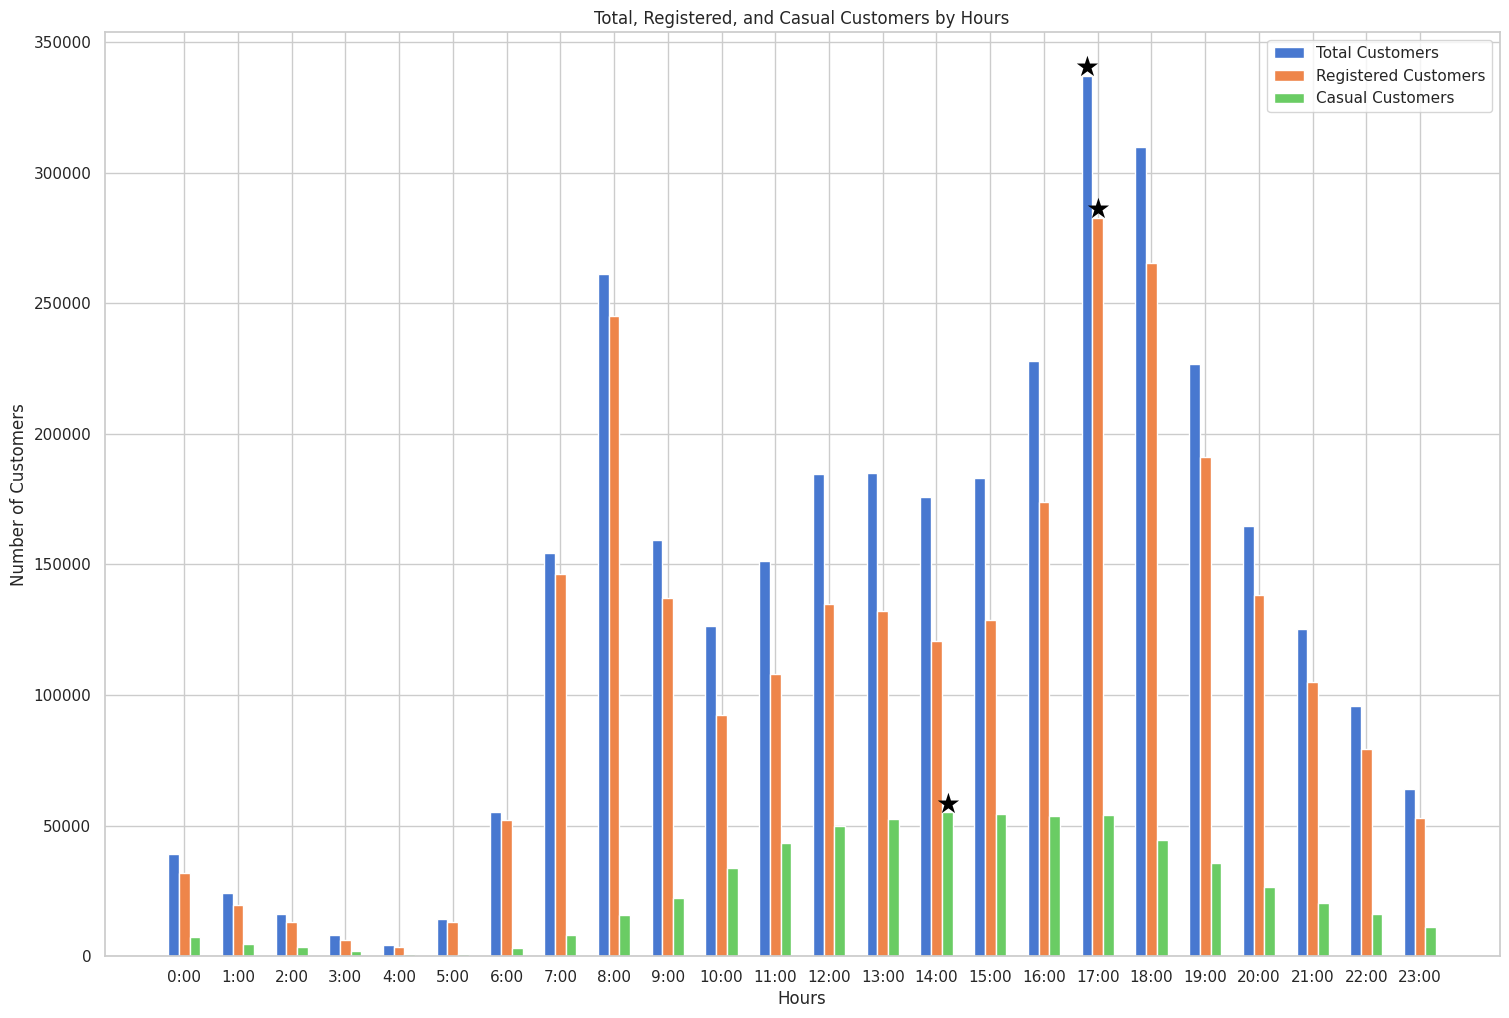

In [168]:
# Set the Seaborn style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("muted")

fig, ax = plt.subplots(figsize=(18, 12))

width = 0.2  # the width of the bars
x = np.arange(len(total_customers.index))
x_labels = [f"{i}:00" for i in total_customers.index]
# Plotting the bars
total_bars = ax.bar(x - width, total_customers['cnt'], width, label='Total Customers', color=palette[0])
registered_bars = ax.bar(x, registered_customers['registered'], width, label='Registered Customers', color=palette[1])
casual_bars = ax.bar(x + width, casual_customers['casual'], width, label='Casual Customers', color=palette[2])

# Highlight the highest bars and add stars
max_total_index = total_customers['cnt'].idxmax()
max_registered_index = registered_customers['registered'].idxmax()
max_casual_index = casual_customers['casual'].idxmax()

# Adding stars above the highest bars
ax.annotate('★',
            (x[max_total_index] - width, total_customers['cnt'][max_total_index] + 5),
            color='black', fontsize=20, ha='center')
ax.annotate('★',
            (x[max_registered_index], registered_customers['registered'][max_registered_index] + 5),
            color='black', fontsize=20, ha='center')
ax.annotate('★',
            (x[max_casual_index] + width, casual_customers['casual'][max_casual_index] + 5),
            color='black', fontsize=20, ha='center')

# Adding labels and title
ax.set_xlabel('Hours')
ax.set_ylabel('Number of Customers')
ax.set_title('Total, Registered, and Casual Customers by Hours')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()

plt.show()


### Pertanyaan 2:

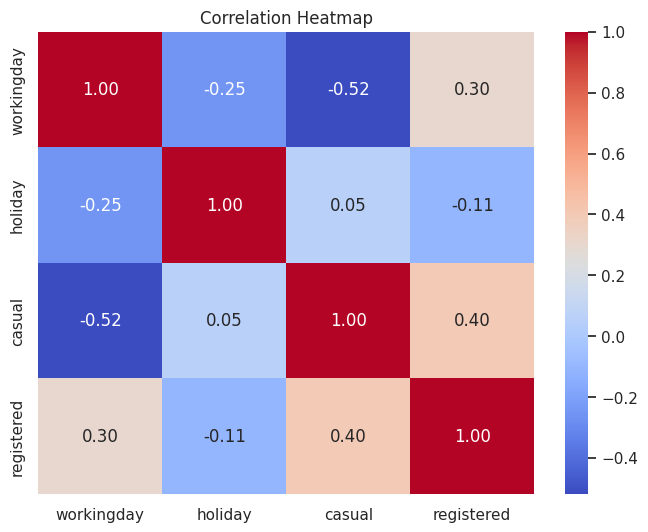

In [169]:
# Create a correlation matrix
correlation_matrix = day_df[['workingday', 'holiday', 'casual', 'registered']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**Insight:**
- Hari tertinggi ditunjukan untuk registered user oleh thursday, untuk total user oleh friday, dan untuk casual user oleh saturday
- Dari hasil korelasi, ditemukan bahwa workingday berkorelasi negatif dengan casual user, dan berkorelasi postif dengan registered user

## Analisis Lanjutan (Opsional)

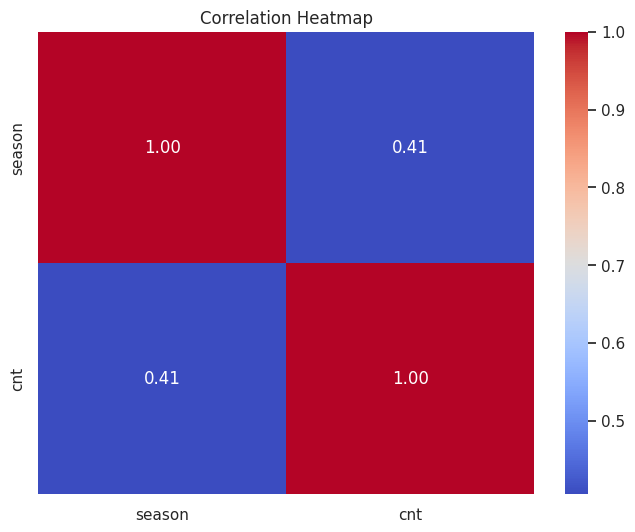

In [170]:
# Create a correlation matrix
correlation_matrix = day_df[['season', 'cnt']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [171]:
day_df.groupby(by='season')[
      ['casual',
       'registered',
       'cnt']].sum().sort_values(by='cnt', ascending=False)

,casual,registered,cnt
season,,,
3,226091,835038,1061129
2,203522,715067,918589
4,129782,711831,841613
1,60622,410726,471348


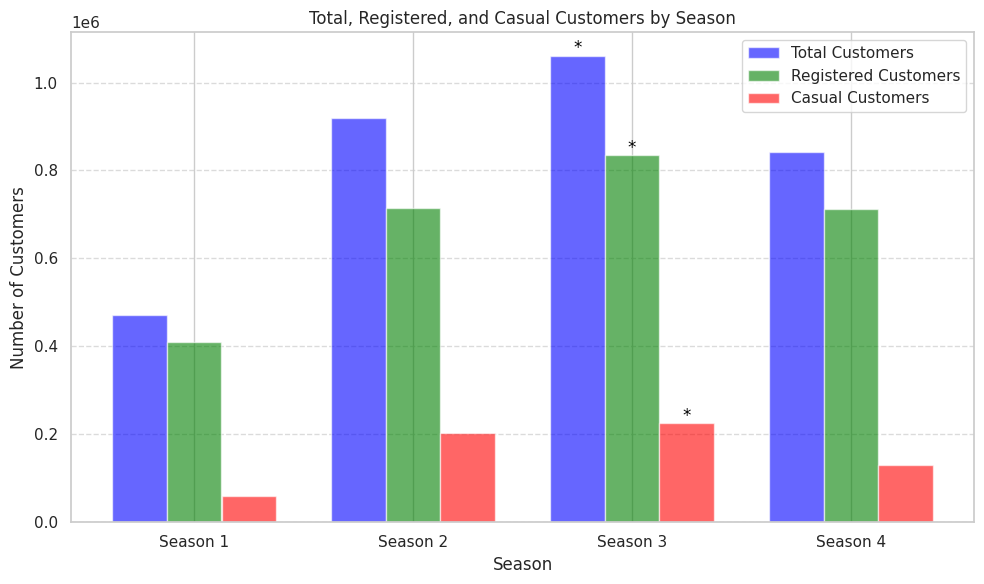

In [172]:
season_data = {
    'season': [1, 2, 3, 4],
    'casual': [60622, 203522, 226091, 129782],
    'registered': [410726, 715067, 835038, 711831],
    'cnt': [471348, 918589, 1061129, 841613]
}

season_df = pd.DataFrame(season_data)

x_labels = season_df['season']
total_values = season_df['cnt']
registered_values = season_df['registered']
casual_values = season_df['casual']

# Plotting
plt.figure(figsize=(10, 6))

# Create bars for each category
bar_width = 0.25
x = range(len(x_labels))

plt.bar([p - bar_width for p in x], total_values, width=bar_width, color='blue', label='Total Customers', alpha=0.6)
plt.bar(x, registered_values, width=bar_width, color='green', label='Registered Customers', alpha=0.6)
plt.bar([p + bar_width for p in x], casual_values, width=bar_width, color='red', label='Casual Customers', alpha=0.6)

# Adding titles and labels
plt.title('Total, Registered, and Casual Customers by Season')
plt.xlabel('Season')
plt.ylabel('Number of Customers')
plt.xticks(x, ['Season 1', 'Season 2', 'Season 3', 'Season 4'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the highest bar in each category
max_total_idx = total_values.idxmax()
max_registered_idx = registered_values.idxmax()
max_casual_idx = casual_values.idxmax()

# Adding annotations above the highest bars
plt.text(max_total_idx - bar_width, total_values.max() + 5000, '*', fontsize=12, ha='center', color='black')
plt.text(max_registered_idx, registered_values.max() + 5000, '*', fontsize=12, ha='center', color='black')
plt.text(max_casual_idx + bar_width, casual_values.max() + 5000, '*', fontsize=12, ha='center', color='black')

# Show plot
plt.tight_layout()
plt.show()


dari hasil heatmap, dan ditemukan korelasi positif antara season dan jumlah pengguna baik register, casual maupun total, hal ini juga dapat terlihat pada bar chart. setiap season memiliki peningkatan kecuali pada season ke-4 yaitu season dingin.  pada bar ini juga terlihat bahwa season-3 yaitu fall memiliki jumlah pengguna

## Conclusion

- Pada hari apa dan jam berapa biasanya terjadi peminjaman sepeda terbanyak? <br>
Jawabannya secara total pengguna akan meminjam pada hari jumat. Ada keunuikan yaitu untuk pengguna yang telah terdaftar atau registed user biasanya melakukan peminjaman di hari kamis, dan untuk pengguna casual biasanya melakukan peminjaman di hari sabtu. Hal ini mungkin diakibatkan oleh working hour yang akan dijawab pada pertanyaan ke2. Kemudian untuk jam, secara total pengguna akan meminjam pada jam 6 sore, hal ini pun berlaku untuk pengguna yang telah terdaftar, berbeda dengan casual user yang paling sering melakukan peminjaman pada jam 2 siang.
- Apakah ada pengaruh workingday, holiday pada casual atau registered user <br>
Jawabannya ternyata ada, walaupun hanya 50% ternyata untuk casual user pada hari non workingday kebanyakan meminjam sepeda, dan 30% untuk registed user meminjam sepeda pada non workingday
